In [30]:
!pip install yolov5 --quiet

In [139]:
import yolov5
import cv2
%matplotlib inline
from matplotlib import pyplot as plt
import pandas as pd

In [32]:
%cd /Users/sumukhiganesan/GitHub/ds5500-capstone-project/yolov5

/Users/sumukhiganesan/GitHub/ds5500-capstone-project/yolov5


In [71]:
# Load custom models
# model1 = yolov5.load('runs/train/exp1/weights/best.pt')  
# model2 = yolov5.load('runs/train/exp2/weights/best.pt') 
model3 = yolov5.load('runs/train/exp3/weights/best.pt') 

In [207]:
img_path = '/Users/sumukhiganesan/GitHub/ds5500-capstone-project/datasets/detection_dataset/images/train/00003.png'

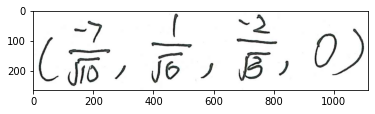

In [208]:
# Load image
img = cv2.imread(img_path) 
plt.imshow(img)
plt.show()

In [209]:
results = model3(img_path)

In [210]:
results

YOLOv5 <class 'yolov5.models.common.Detections'> instance
image 1/1: 263x1114 22 items
Speed: 54.3ms pre-process, 217.1ms inference, 29.6ms NMS per image at shape (1, 3, 160, 640)

In [211]:
predictions = results.pred[0]
boxes = predictions[:, :4] # x1, y1, x2, y2
scores = predictions[:, 4]
categories = predictions[:, 5]

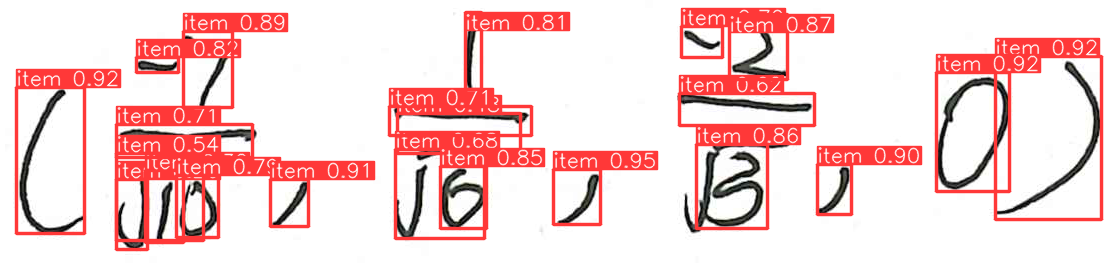

In [212]:
results.show()

In [213]:
info = results.pandas().xyxy[0].to_dict(orient = "records")

In [214]:
df = pd.DataFrame(info)

df = df.sort_values(["xmin"]).reset_index(drop=True)

(50.64973545074463, 160.33674240112305)
(184.18249130249023, 141.17732620239258)
(132.14039611816406, 214.5680923461914)
(160.16793823242188, 196.92713928222656)
(157.30831909179688, 65.25525856018066)
(164.65753173828125, 206.61527252197266)
(197.60018157958984, 206.7012176513672)
(207.8777618408203, 69.65180778503418)
(289.8108367919922, 203.22543334960938)
(460.8675842285156, 121.15995025634766)
(440.3224792480469, 193.93196868896484)
(458.87994384765625, 133.63278198242188)
(463.5961456298828, 197.56832885742188)
(473.5511474609375, 51.005247592926025)
(576.8656616210938, 197.29443359375)
(746.9633483886719, 109.37030792236328)
(702.0061645507812, 41.921247482299805)
(731.7351989746094, 186.46239471435547)
(758.3871154785156, 47.06661510467529)
(834.2356872558594, 189.27932739257812)
(972.9931335449219, 132.28544235229492)
(1048.4481201171875, 138.05651473999023)


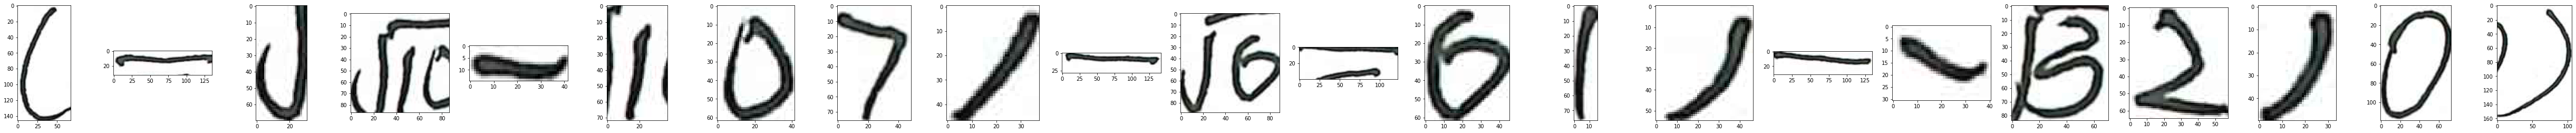

In [215]:
num_objects = len(info)
fig, ax = plt.subplots(1, num_objects, figsize=(num_objects * 4, 4))
for i, obj in df.iterrows():
    symbol = img[int(obj["ymin"]):int(obj["ymax"]), int(obj["xmin"]):int(obj["xmax"])]
    print(tuple([(obj["xmin"] + obj["xmax"])/2, (obj["ymin"] + obj["ymax"])/2]))
    ax[i].imshow(symbol)

In [78]:
# !python val.py --weights runs/train/exp3/weights/best.pt --data ../datasets/custom_dataset.yaml --task test --single-cls